# <div style="background:rgba(53, 144, 235, 0.64); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicios Prácticos con Matplotlib y Seaborn
</div>

**¡Vamos a poner en práctica lo aprendido!** 

Esta guía de ejercicios está pensada para reforzar los conceptos trabajados en la notebook `Presentation_VIZ`. Cada ejercicio incluye, además, una posible solución desarrollada por el **Equipo Lambda**.


<div style="background:#E8F0FE; border-left: 5px solid rgba(53, 144, 235, 0.64); padding: 12px; margin-bottom: 16px; color:#181818;">
No olvidar que se necesitan las mismas librerías con las que veníamos trabajando.
</div>

##### **Importar librerías y datasets**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Cargar dataset
data = pd.read_csv(
    "../../../datasets/alumnos/lambda-09-wine_dataset/data/Wine dataset.csv"
)

# Ver primeras filas
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### <div style="background:rgba(48, 216, 154, 0.65); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicio 1: Primer vistazo a la distribución de los datos
</div>

**Pregunta:** ¿Cuál es la distribución de la calidad del vino?

**Descripción:** Utiliza un histograma para visualizar la frecuencia de las diferentes puntuaciones de calidad. Esto te dará una idea de si la calidad se distribuye de manera uniforme, si hay un valor más común o si los valores se agrupan en algún rango.

##### **Solución propuesta**

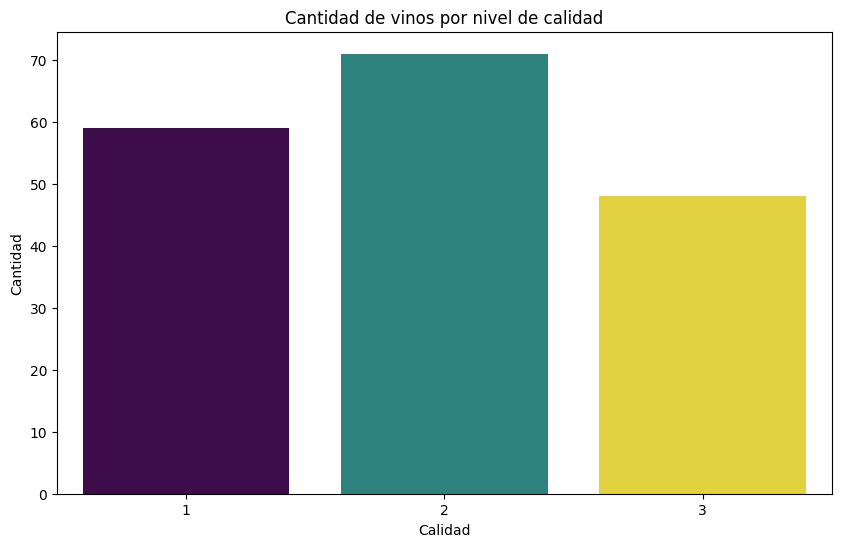

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(x="class", hue="class", data=data, palette="viridis", legend=False)
plt.title("Cantidad de vinos por nivel de calidad")
plt.xlabel("Calidad")
plt.ylabel("Cantidad");

### <div style="background:rgba(160, 48, 216, 0.46); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicio 2: Explorando la influencia de dos variables
</div>

**Pregunta:** Seleccionando 2 caracteristicas del dataset, ¿existe alguna clara influencia de estas en la calidad del vino?

**Descripción:** Crea un gráfico de dispersión (scatter plot) para visualizar la influencia de las caracteristicas en la calidad. Con seaborn.scatterplot, podes usar la calidad del vino para separar por colores con 'hue="class"'.

##### **Solución propuesta**

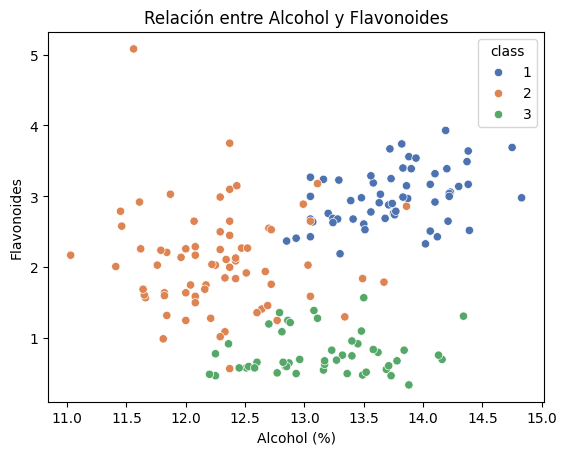

In [3]:
sns.scatterplot(x="Alcohol", y="Flavanoids", data=data, hue="class", palette="deep")
plt.title("Relación entre Alcohol y Flavonoides")
plt.xlabel("Alcohol (%)")
plt.ylabel("Flavonoides");

### <div style="background:rgba(48, 73, 216, 0.65); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicio 3: Distribuciones de variables
</div>

**Pregunta:** ¿Hay alguna correlación entre las variables que seleccionaste?. Podes agregar caracteristicas si lo consideras necesario.

**Descripción:** Crea un histograma con función de densidad para ver cómo se distribuye cada variable, y poder encontrar posibles relaciones. Para esto es conveniente usar 'sns.histplot()'.

##### **Solución propuesta**

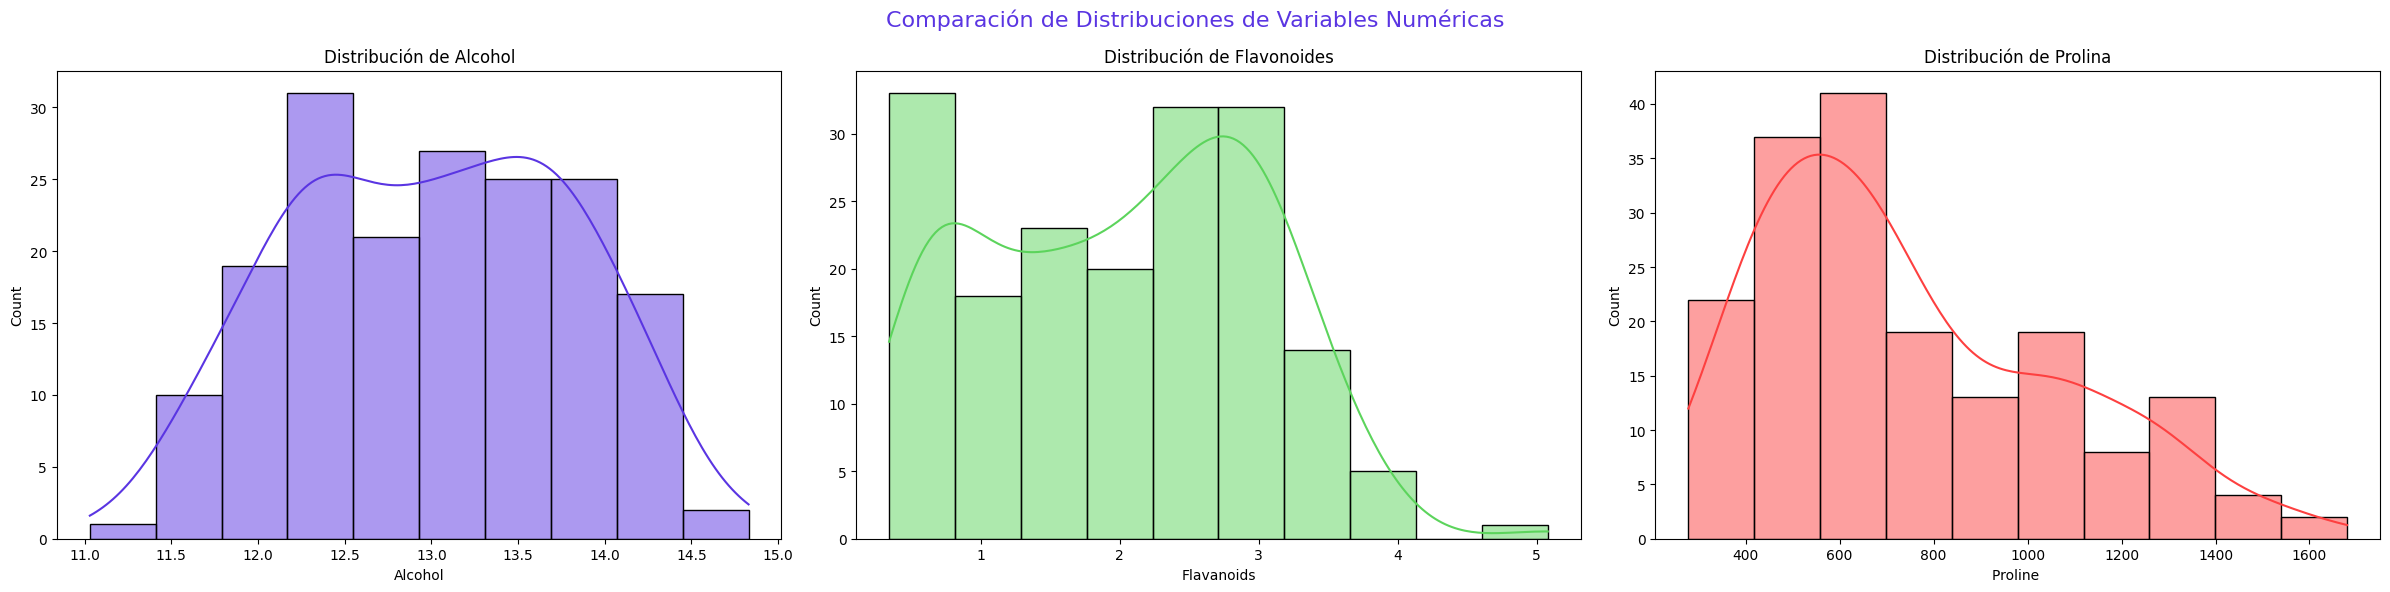

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(
    ax=axes[0], x=data["Alcohol"], bins=10, kde=True, cbar=True, color="#5A35E2"
).set(title="Distribución de Alcohol")

sns.histplot(
    ax=axes[1], x=data["Flavanoids"], bins=10, cbar=True, kde=True, color="#5CD45C"
).set(title="Distribución de Flavonoides")

sns.histplot(
    ax=axes[2], x=data["Proline "], bins=10, kde=True, cbar=True, color="#FD4040"
).set(title="Distribución de Prolina")

plt.suptitle(
    "Comparación de Distribuciones de Variables Numéricas", fontsize=16, color="#5A35E2"
)
plt.tight_layout()

### <div style="background:rgba(247, 203, 29, 0.62); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicio 4: Descubriendo correlaciones con un mapa de calor
</div>

**Pregunta:** ¿Cuáles variables están más fuertemente correlacionadas con la calidad del vino?

**Descripción:** Calcula la matriz de correlación de las variables del dataset. Después, crea un mapa de calor (heatmap) usando 'sns.heatmap' para visualizar estas correlaciones. Esta es una forma más directa de analizar la influencia de cada caracteristica del vino a su calidad.

##### **Solución propuesta**

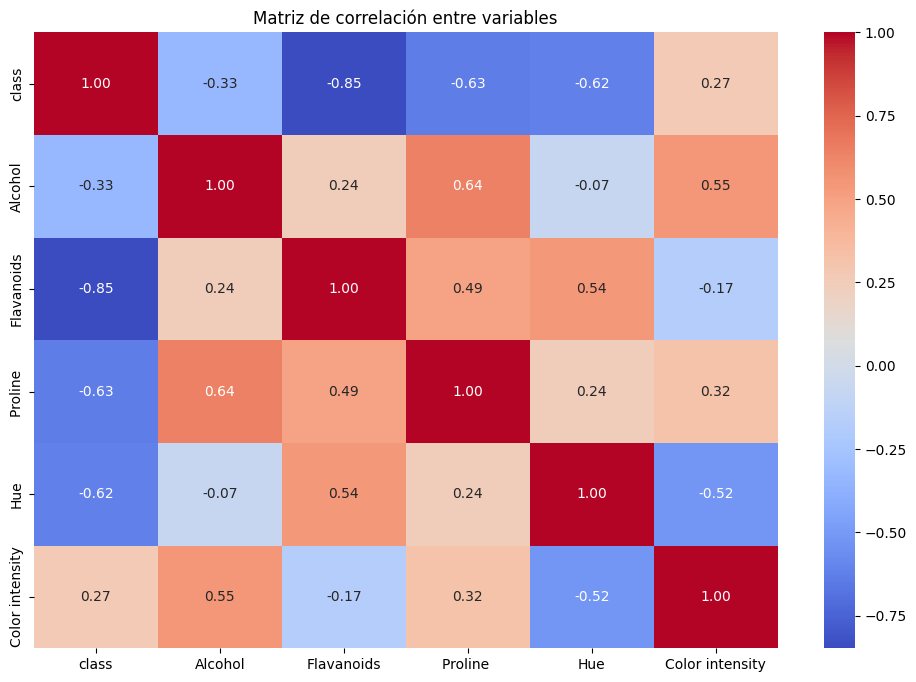

In [5]:
plt.figure(figsize=(12, 8))

# Se seleccionan solo algunas caracteristicas para facilitar la lectura
caracteristicas = data[
    ["class", "Alcohol", "Flavanoids", "Proline ", "Hue", "Color intensity"]
].corr()
sns.heatmap(caracteristicas, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables");

### <div style="background:rgba(216, 48, 48, 0.65); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicio 5: Enfocándonos en las variables clave
</div>

**Pregunta:** Después de ver el mapa de calor, ¿cómo se distribuyen las variables con mayor correlación con la calidad?

**Descripción:** Selecciona las 3 o 4 variables que mostraron la mayor correlación con la calidad en el mapa de calor y crea un gráfico de pares (pairplot) con 'sns.pairplot' para visualizar la distribución de cada una de estas variables y sus relaciones entre sí.

##### **Solución propuesta**

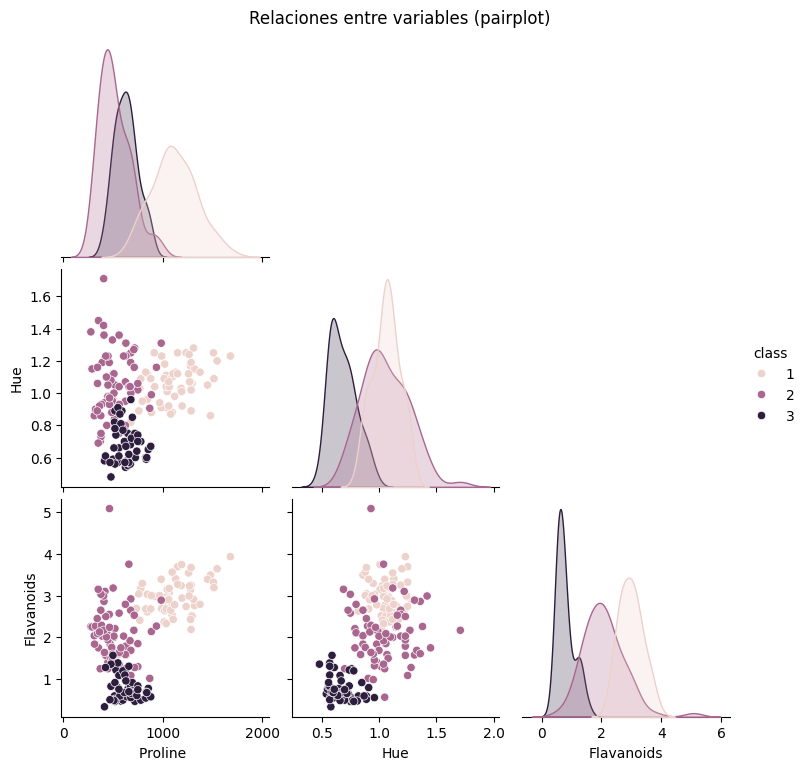

In [6]:
warnings.filterwarnings("ignore")

cols = ["Proline ", "Hue", "Flavanoids", "class"]
sns.pairplot(data[cols], hue="class", corner=True, diag_kind="kde")
plt.suptitle("Relaciones entre variables (pairplot)", y=1.02);

### <div style="background:rgba(48, 213, 216, 0.77); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Ejercicio 6: Identificando outliers
</div>

**Pregunta:** ¿Existen valores atípicos en alguna de las características?

**Descripción:** Genera un gráfico de caja (o un 'sns.violinplot') para ver la distribución de algunas características del vino. Si existen outliers, identificalos.

##### **Solución propuesta**

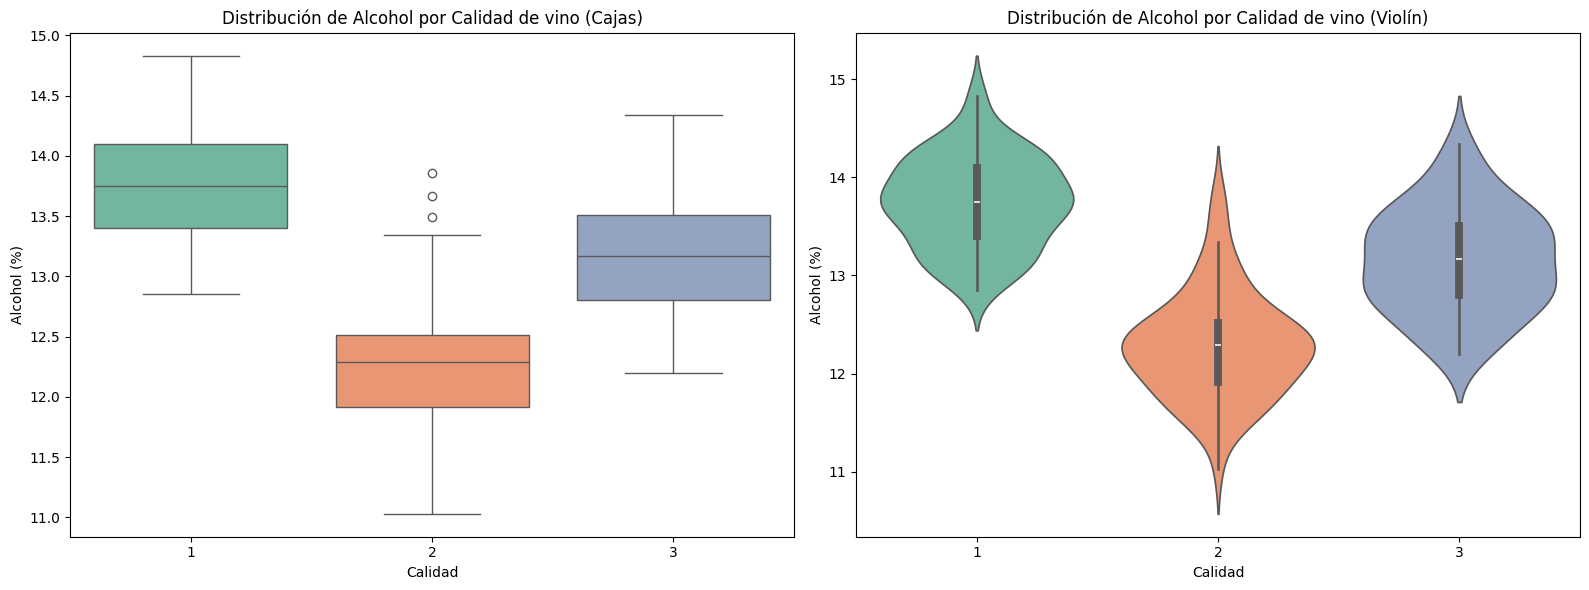

In [7]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="class", y="Alcohol", data=data, palette="Set2")
plt.title("Distribución de Alcohol por Calidad de vino (Cajas)")
plt.xlabel("Calidad")
plt.ylabel("Alcohol (%)")

plt.subplot(1, 2, 2)
sns.violinplot(x="class", y="Alcohol", data=data, palette="Set2")
plt.title("Distribución de Alcohol por Calidad de vino (Violín)")
plt.xlabel("Calidad")
plt.ylabel("Alcohol (%)")

plt.tight_layout()
plt.show()